##### <font color=#A0A0A0>
### ════════════════════════════════════════════════════════
####     📊 **MODEL TRAINING**
### ═══════════════════════════════════════════════════════ </font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_regression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [3]:
#Data loading
data = pd.read_csv('../data/apartments_bogota.csv')
data.head()

,longitude,latitude,stratum,bathrooms,constructed_area,house_age,bedrooms,parking,administration,floor,rent_price,Localidad
0,-74.048398,4.700991,5.0,2.0,97.0,12.0,2.0,2.0,0.0,0.0,4500000.0,USAQUEN
1,-74.055693,4.687506,6.0,1.0,42.0,12.0,1.0,1.0,0.0,5.0,2800000.0,USAQUEN
2,-74.052512,4.675927,6.0,4.0,116.0,23.0,4.0,2.0,0.0,7.0,5500000.0,CHAPINERO
3,-74.049210,4.672860,5.0,3.0,138.0,23.0,3.0,2.0,0.0,4.0,8000000.0,CHAPINERO
4,-74.050727,4.700429,5.0,2.0,78.0,23.0,3.0,1.0,0.0,3.0,4000000.0,USAQUEN


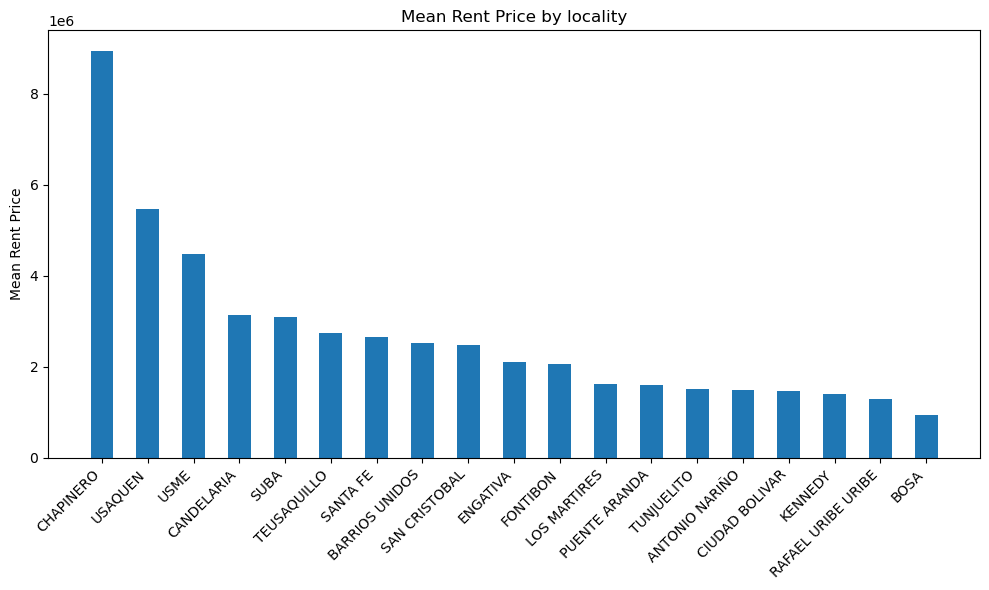

In [19]:
mean_price_localidad = data.groupby('Localidad')['rent_price'].mean().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(
    mean_price_localidad.index,
    mean_price_localidad.values,
    width=0.5  
)
plt.ylabel('Mean Rent Price')
plt.title('Mean Rent Price by locality')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()